# B

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Na    = 2
Rf    = 0.03 
mu    = np.array([0.08,0.12]).reshape((Na,1))
sigma = np.array([0.25,0.35]).reshape((Na,1))
b     = np.array([0.02,0.02]).reshape((Na,1))
rho   = 0.5
gamma = 1

mcov = np.array([sigma[0]**2,rho*sigma[0]*sigma[1],rho*sigma[0]*sigma[1],sigma[1]**2]).reshape((Na,Na))
X0 = 1


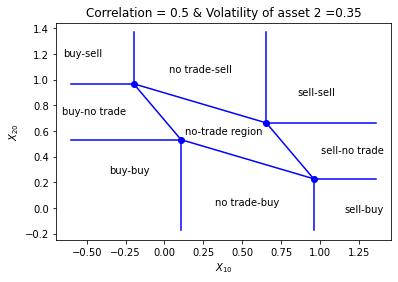

In [3]:
def U_2asset(X0,X1,gamma,Rf,mu,mcov,b,a): 
    U = Rf+X1.T@(mu-Rf)-0.5*gamma*(X1.T@(mcov@X1))-(X1-X0).T@np.multiply(b,a)
    return U

def X1_2T(X0,gamma,mu,mcov,b,a): 
    invcov = np.linalg.inv(mcov)
    X1_o = (invcov@(mu-Rf-np.multiply(b,a)))/gamma
    return X1_o

def X1_1T(X0_NT,gamma,mu,mcov,b,idx_T,a): 
    X1_T = (mu[idx_T]-Rf-b[idx_T]*a-mcov[0][1]*X0_NT)/(gamma*mcov[idx_T][idx_T])
    return X1_T

def trade_regions(X0,gamma,mu,rho,sigma,b): 
    Na = len(mu)
    mcov = np.array([sigma[0]**2,rho*sigma[0]*sigma[1],rho*sigma[0]*sigma[1],sigma[1]**2]).reshape((Na,Na))

    X1_bb = X1_2T(X0,gamma,mu,mcov,b,np.array([1,1]).reshape(Na,1))
    X1_bs = X1_2T(X0,gamma,mu,mcov,b,np.array([1,-1]).reshape(Na,1))
    X1_sb = X1_2T(X0,gamma,mu,mcov,b,np.array([-1,1]).reshape(Na,1))
    X1_ss = X1_2T(X0,gamma,mu,mcov,b,np.array([-1,-1]).reshape(Na,1))

    Delta = 0.4
    xmin = X1_bs[0]-Delta
    xmax = X1_sb[0]+Delta
    ymin = X1_sb[1]-Delta
    ymax = X1_bs[1]+Delta

    Np = 100
    BB1_x = np.linspace(xmin,X1_bb[0],Np)
    BB1_y = X1_bb[1]*np.ones((Np,1))
    BB2_x = X1_bb[0]*np.ones((Np,1))
    BB2_y = np.linspace(ymin,X1_bb[1],Np)

    SS1_x = np.linspace(X1_ss[0],xmax,Np)
    SS1_y = X1_ss[1]*np.ones((Np,1))
    SS2_x = X1_ss[0]*np.ones((Np,1))
    SS2_y = np.linspace(X1_ss[1],ymax,Np)

    BS1_x = np.linspace(xmin,X1_bs[0],Np)
    BS1_y = X1_bs[1]*np.ones((Np,1))
    BS2_x = X1_bs[0]*np.ones((Np,1))
    BS2_y = np.linspace(X1_bs[1],ymax,Np)

    SB1_x = np.linspace(X1_sb[0],xmax,Np)
    SB1_y = X1_sb[1]*np.ones((Np,1))

    SB2_x = X1_sb[0]*np.ones((Np,1))
    SB2_y = np.linspace(ymin,X1_sb[1],Np)

    NS_x = np.linspace(X1_bs[0],X1_ss[0],Np).reshape((Np,1))
    NS_y = np.empty((Np,1))
    for i in range(Np): NS_y[i] = X1_1T(NS_x[i],gamma,mu,mcov,b,1,-1)

    NB_x = np.linspace(X1_bb[0],X1_sb[0],Np).reshape((Np,1))
    NB_y = np.empty((Np,1))
    for i in range(Np): NB_y[i] = X1_1T(NB_x[i],gamma,mu,mcov,b,1,1)

    BN_x = np.empty((Np,1))
    BN_y = np.linspace(X1_bs[1],X1_bb[1],Np).reshape((Np,1))
    for i in range(Np): BN_x[i] = X1_1T(BN_y[i],gamma,mu,mcov,b,0,1)

    SN_x = np.empty((Np,1))
    SN_y = np.linspace(X1_ss[1],X1_sb[1],Np).reshape((Np,1))
    for i in range(Np): SN_x[i] = X1_1T(SN_y[i],gamma,mu,mcov,b,0,-1)

    plt.plot(X1_bb[0],X1_bb[1],'bo')
    plt.plot(X1_bs[0],X1_bs[1],'bo')
    plt.plot(X1_sb[0],X1_sb[1],'bo')
    plt.plot(X1_ss[0],X1_ss[1],'bo')
    plt.plot(BB1_x,BB1_y,'b-')
    plt.plot(BB2_x,BB2_y,'b-')
    plt.plot(SS1_x,SS1_y,'b-')
    plt.plot(SS2_x,SS2_y,'b-')
    plt.plot(BS1_x,BS1_y,'b-')
    plt.plot(BS2_x,BS2_y,'b-')
    plt.plot(SB1_x,SB1_y,'b-')
    plt.plot(SB2_x,SB2_y,'b-')
    plt.plot(NS_x,NS_y,'b-')
    plt.plot(NB_x,NB_y,'b-')
    plt.plot(BN_x,BN_y,'b-')
    plt.plot(SN_x,SN_y,'b-')
    plt.xlabel('$X_{10}$')
    plt.ylabel('$X_{20}$')
    axes = plt.gca()
    loc = (X1_bb[0]-0.2,X1_bb[1]-0.2)
    axes.annotate('buy-buy', 
                  xy=loc, 
                  xytext=loc, ha="right", va="top")
    loc = (X1_ss[0]+0.2,X1_ss[1]+0.2)
    axes.annotate('sell-sell', 
                  xy=loc, xytext=loc, ha="left", va="bottom")
    loc = (X1_bs[0]-0.2,X1_bs[1]+0.2)
    axes.annotate('buy-sell', xy=loc, xytext=loc, ha="right", va="bottom")
    loc = (X1_sb[0]+0.2,X1_sb[1]-0.2)
    axes.annotate('sell-buy', 
                  xy=loc, xytext=loc, ha="left", va="top")
    loc = ((X1_bs[0]+X1_ss[0])/2,(X1_bs[1]+X1_ss[1])/2+0.3)
    axes.annotate('no trade-sell', 
                  xy=loc, xytext=loc, ha="center", va="top")
    loc = ((X1_bb[0]+X1_sb[0])/2,(X1_bb[1]+X1_sb[1])/2-0.3)
    axes.annotate('no trade-buy', xy=loc, xytext=loc, ha="center", va="top")
    loc = ((X1_bb[0]+X1_bs[0])/2-0.2,(X1_bb[1]+X1_bs[1])/2)
    axes.annotate('buy-no trade', xy=loc, xytext=loc, ha="right", va="center")
    loc = ((X1_sb[0]+X1_ss[0])/2+0.2,(X1_sb[1]+X1_ss[1])/2)
    axes.annotate('sell-no trade', 
                  xy=loc, xytext=loc, ha="left", va="center")
    loc = ((X1_bb[0]+X1_ss[0]+X1_sb[0]+X1_bs[0])/4,(X1_bb[1]+X1_ss[1]+X1_sb[1]+X1_bs[1])/4)
    axes.annotate('no-trade region', xy=loc, xytext=loc, ha="center", va="center")
    str_title = 'Correlation = '+str(rho)+' & '+'Volatility of asset 2 ='+np.array_str(sigma[1]).replace("[","")
    str_title = str_title.replace("]","")
    plt.title(str_title)
    plt.show()

    
trade_regions(X0,gamma,mu,rho,sigma,b)


c

Impact of correlation: 


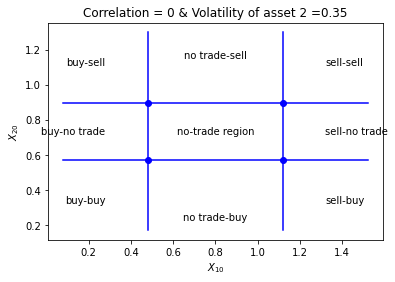

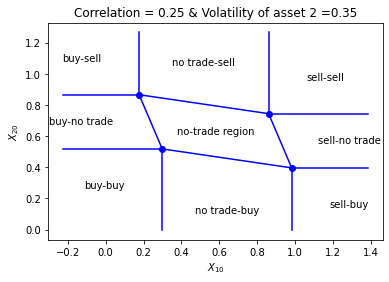

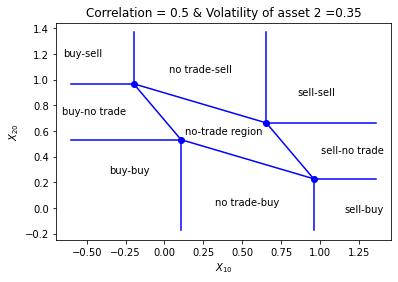

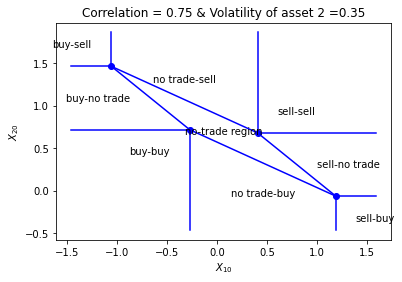

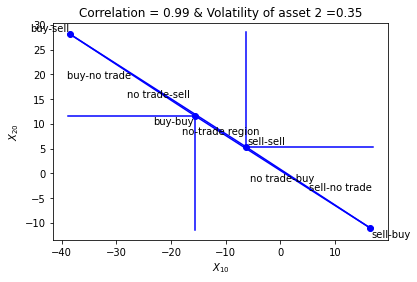

In [4]:
#correlation
print('Impact of correlation: ')
trade_regions(X0,gamma,mu,0,sigma,b)
trade_regions(X0,gamma,mu,0.25,sigma,b)
trade_regions(X0,gamma,mu,0.5,sigma,b)
trade_regions(X0,gamma,mu,0.75,sigma,b)
trade_regions(X0,gamma,mu,0.99,sigma,b)

When corr=0, the no-trade region is rectangle. Since corr = 0, the two risky assets can't impact each other, the no-trade region of each asset is exactly the same in only one asset situation. When corr is not zero, no-trade region shape changes to parallelogram since the edge slope of no-trade region is decided by corr when sigma ratio is fixed. When corr=1, no-trade region will become a line.

Impact of volatility of asset 2: 


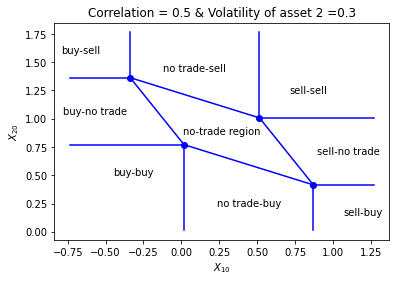

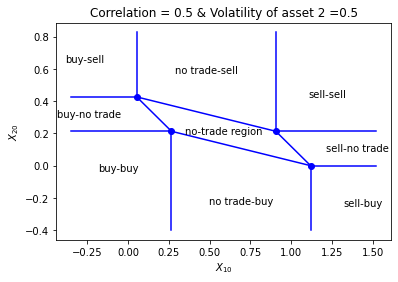

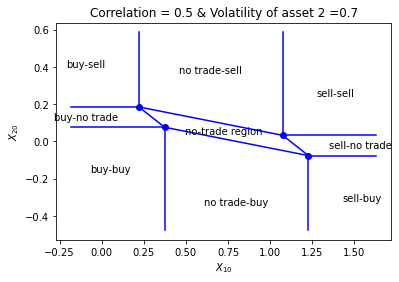

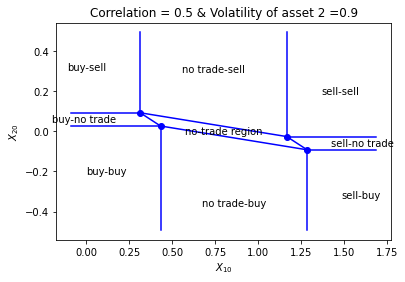

In [6]:
# making asset 2 risky
print('Impact of volatility of asset 2: ')
sigma_new = np.copy(sigma)
sigma_new[1] = 0.3
trade_regions(X0,gamma,mu,rho,sigma_new,b)
sigma_new[1] = 0.5
trade_regions(X0,gamma,mu,rho,sigma_new,b)
sigma_new[1] = 0.7
trade_regions(X0,gamma,mu,rho,sigma_new,b)
sigma_new[1] = 0.9
trade_regions(X0,gamma,mu,rho,sigma_new,b)

the no-trade region is parallelogram. The edge slope of no-trade region in asset 2 is decided by corr and sigma ratio between two risky asset. When fixing corr, as asset 2 becomes riskier, this edge slope becomes smaller, the parallellogram becomes more long and narrow and less like a rectangle. When the risk of asset 2 is very high, the no-trade region will also become a parallel line